# Introduction
Youtube videos are not only produced by vbloger or their other name, "Youtubers". Media corporations including Disney, CNN, BBC, and Hulu also offer some of their material via YouTube as part of the YouTube partnership program.

If your company, or yourself, a potential million-view youtuber, intend to employ this huge platform to publish your video, it is essential to enhance the content quality, and to increase its visibility. But why Youtube? Because it offers the possibility to monetize your videos, by adding ads during the video progression. With an in-depth analysis of thousands of videos, we could find several keys to increase views, likes, and the most important of all, your incomes.

The data used in this report can be found at: https://www.kaggle.com/datasnaek/youtube-new/

The website says that it was last updated on May, 2019; however the lastest publish date in the data in 2018/06/14

# Description
The dataset includes data gathered from 40949 videos on YouTube that are contained within the trending category each day.

There are two kinds of data files, one includes comments (JSON) and one includes video statistics (CSV). They are linked by the unique video_id field.

The columns in the video file are:
1. title
2. channel_title
3. video_id(Unique id of each video)
4. trending_date
5. title
6. channel_title
7. category_id (Can be looked up using the included JSON file)
8. publish_time
9. tags (Separated by | character, [none] is displayed if there are no tags)
10. views
11. likes
12. dislikes
13. comment_count
14. thumbnail_link
15. comments_disabled
16. ratings_disabled
17. video_error_or_removed
18. description

# Data Preparation

Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import wordcloud, STOPWORDS
import warnings
from collections import Counter
import datetime
import glob

In [2]:
#hiding warnings for cleaner display
warnings.filterwarnings('ignore')

#Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#For interactive plots
%matplotlib notebook

In [3]:
df = pd.read_csv("../input/youtube-new/USvideos.csv")
df_ca = pd.read_csv("../input/youtube-new/CAvideos.csv")
df_de = pd.read_csv("../input/youtube-new/DEvideos.csv")
df_fr = pd.read_csv("../input/youtube-new/FRvideos.csv")
df_gb = pd.read_csv("../input/youtube-new/GBvideos.csv")

# Setting up configuration for visuals

In [4]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)


# Data Exploration

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Statistical Information about the numerical columns of dataset!

In [6]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


Notes from above table:
1. Average number of likes - 74266, whereas dislikes are 3711
2. Average number of views - 2,360,784 and median is 681861
3. Average comment count - 8446 and max - 13,61,580

In [7]:
df.shape

(40949, 16)

Now let's see some information about our dataset

In the dataset, the Trending Date and Published Time are not in the Unix date-time format. Let's fix this first.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

There are 40379 entries in the dataset and all the columns in the dataset are complete(i.e. they have 40,949 non null entries) except description column which has some null values; it only has 40,379 non null values

DATA CLEANING
The Description column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by NaN

**For Data cleaning, and to get rid of null values that were set to empty string in place of each nullvalue in the description Column**

In [9]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


# Let's see the Collection year of Data

<IPython.core.display.Javascript object>


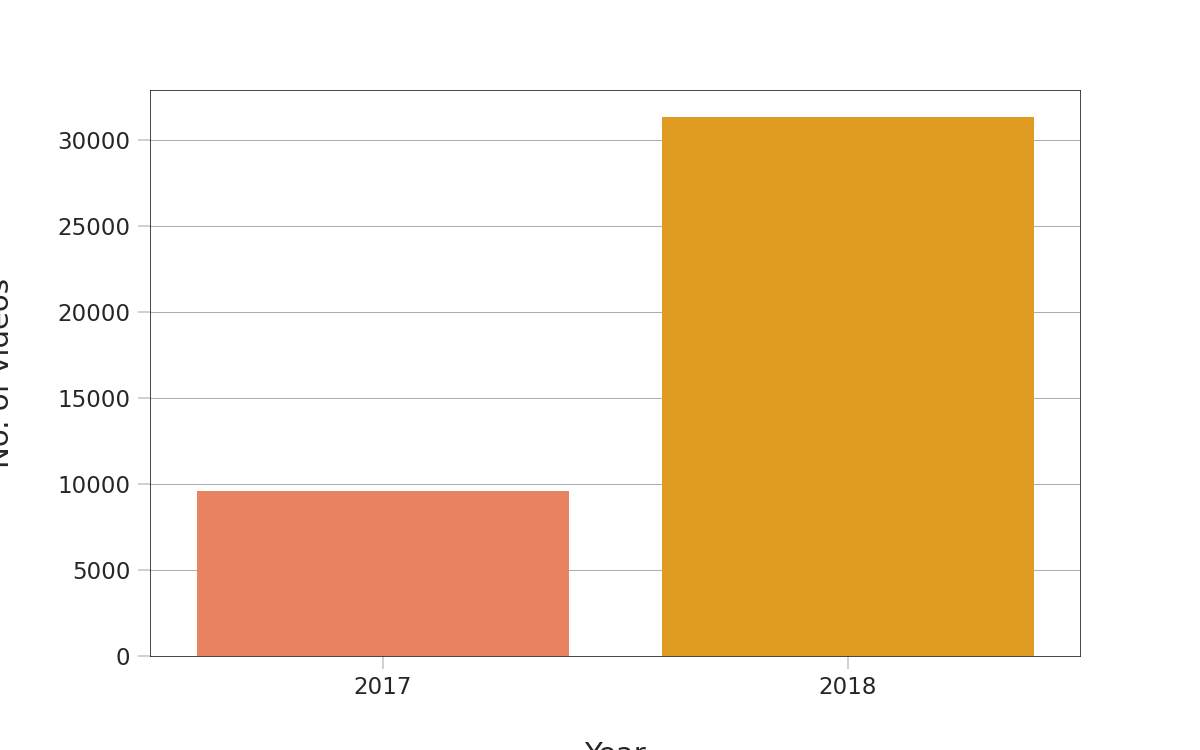

In [10]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts()\
.to_frame().reset_index()\
.rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data = cdf, 
                palette = sns.color_palette(['#ff764a','#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [11]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

We can see that dataset was collected in 2017-18

77% in 2017 and 23% in 2018

**To see the correlation between the likes, dislikes, comments,and views lets plot a correlation matrix**

<IPython.core.display.Javascript object>


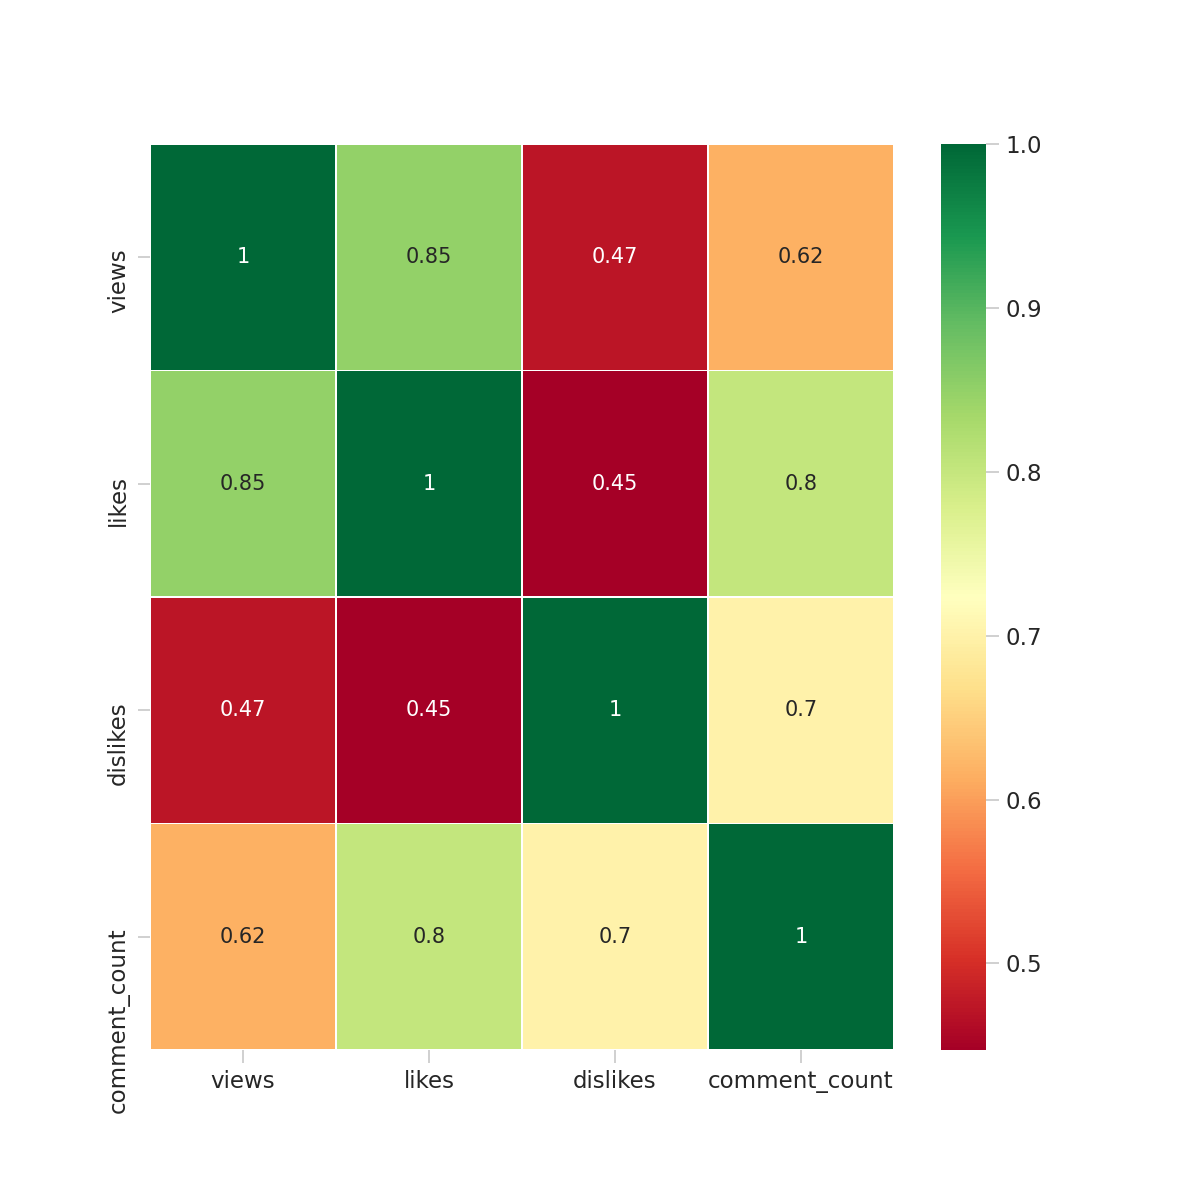

In [12]:
columns_show = ['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
dfe = df[columns_show].corr()
sns.heatmap(dfe,mask=np.zeros_like(dfe, dtype=np.bool), cmap='RdYlGn',linewidth=0.30,annot=True)

In the correlation plot matrix, for USA dataset, the columns with:
1. High correlation - Views and likes, comment_count and Dislikes
2. Medium Correlation - Views and comment_count, comment_count and dislikes
3. Low Correlation - Likes and Dislike

Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

<IPython.core.display.Javascript object>


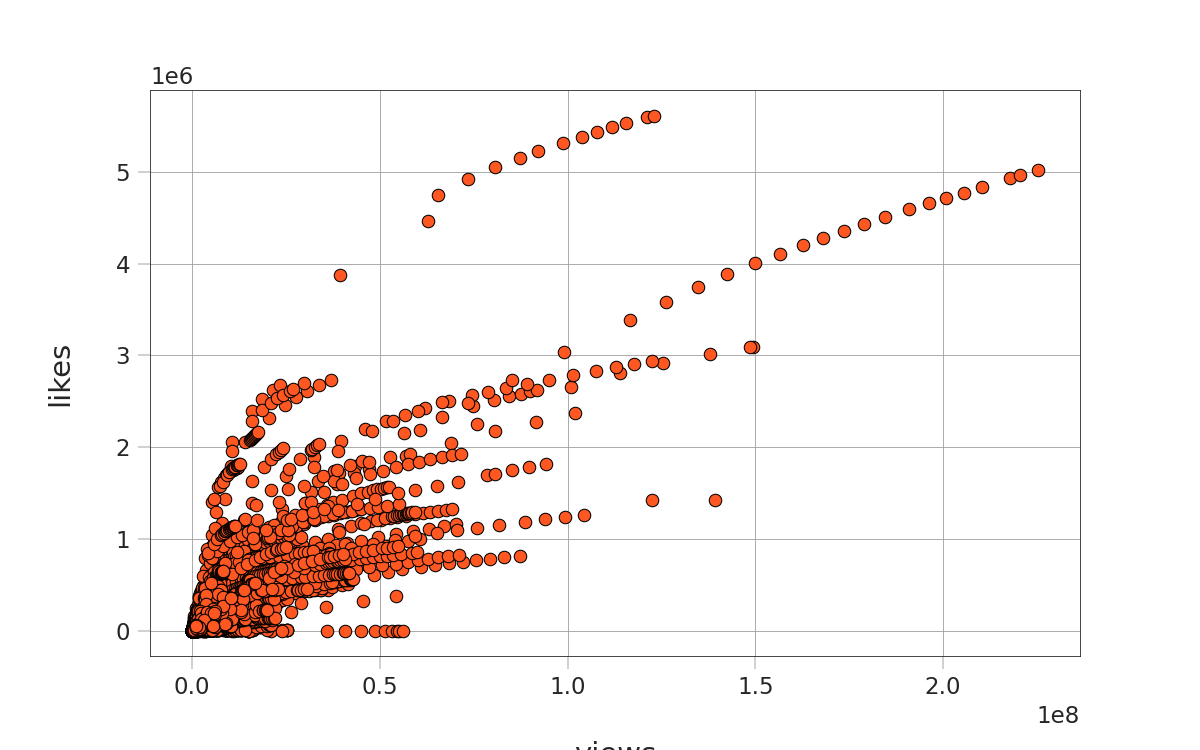

In [13]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color = PLOT_COLORS[2], edgecolors="#000000",
               linewidth=0.5)
_ = ax.set(xlabel="views", ylabel="likes")

we can see that views and likes are truly positively correlated: as one increases, the other increases too-mostly.

# Histogram of Views to verify-
1. How many videos are between 10 million and 20 million views
2. How many videos have between 20 million and 30 million views, and so on

<IPython.core.display.Javascript object>


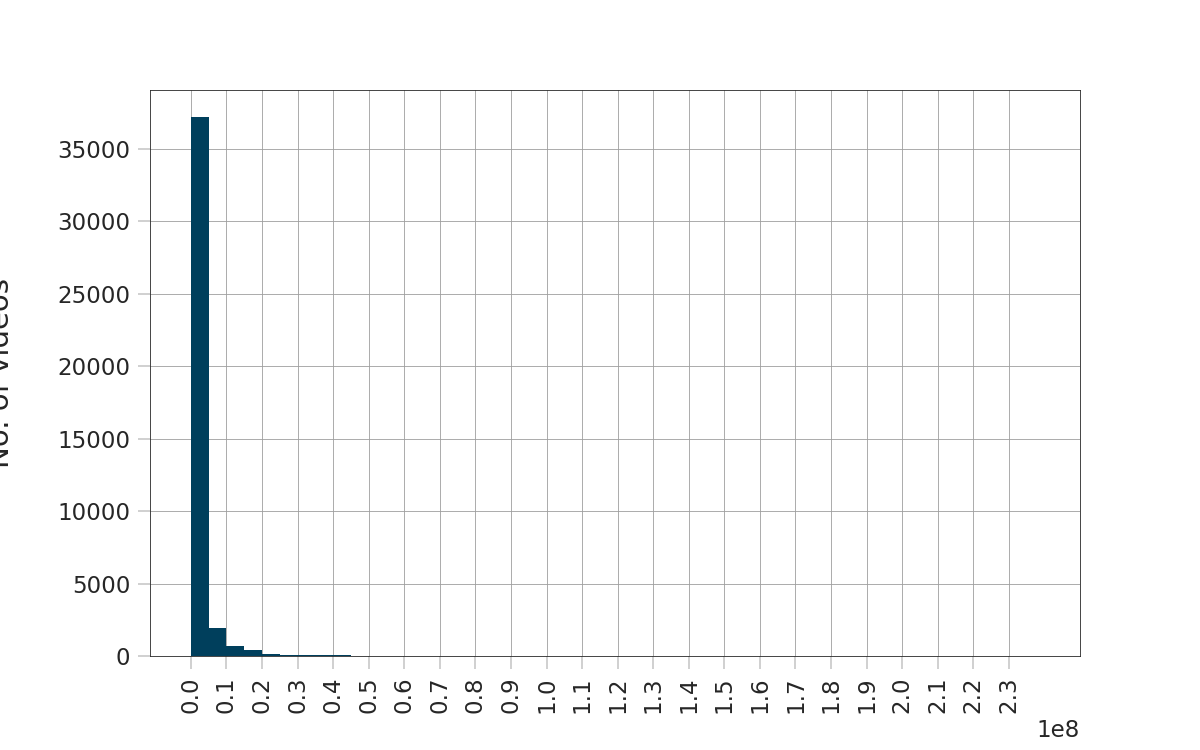

In [14]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4],
                hist_kws={'alpha': 1},bins=np.linspace(0, 2.3e8,47),ax=ax)
_ = ax.set(xlabel="Views",ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have 5million views or less.

Now lets us plot the histogram for videos with 25million views or less to get a closer look at the distribution of the data

<IPython.core.display.Javascript object>


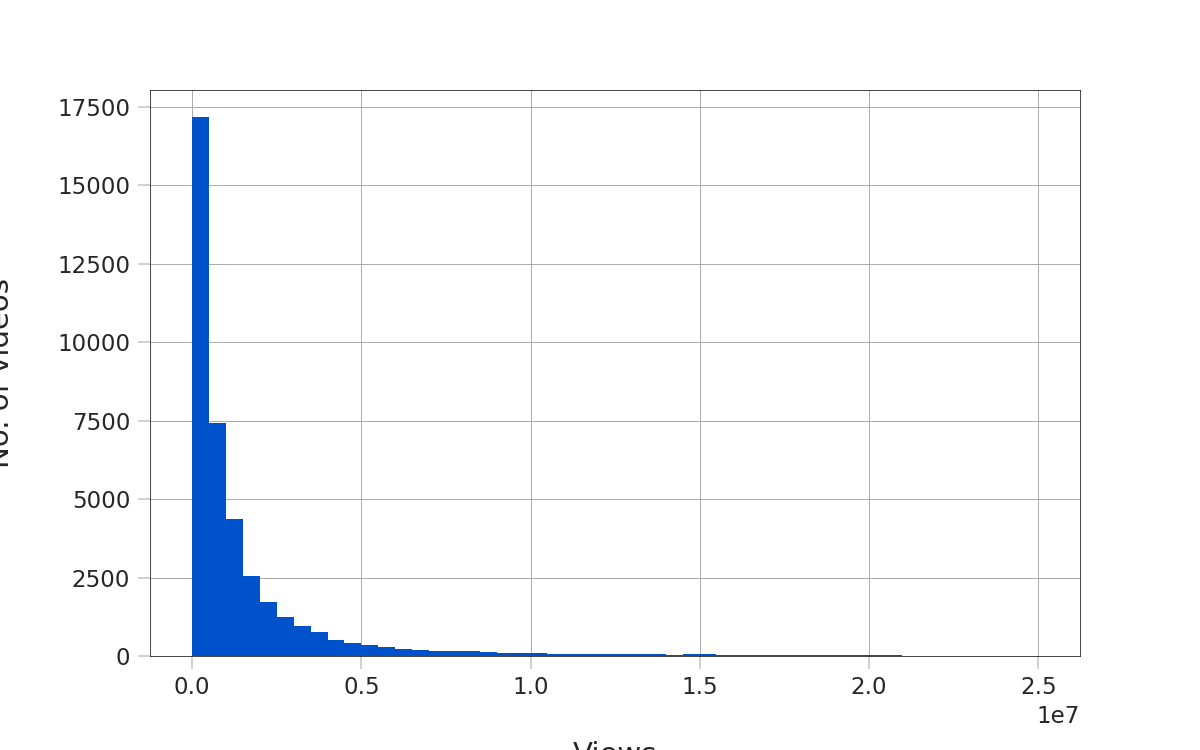

In [15]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"]<25e6]["views"], kde=False, color=PLOT_COLORS[1], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

**Now we see the majority of trending videos have 1million views or less. let's see the exact percentage of videos less than 1million views**

In [16]:
df[df['views']<1e6]['views'].count()/df['views'].count() * 100

60.09426359618062

Since, it's around 60%. Similarly, we see the percentage of videos with less than 1.5 million views is approx 71%, and that the percentage of videos with less than 5million views is around 91%

# Likes Histogram

After views, we will plot the histogram for likes column

<IPython.core.display.Javascript object>


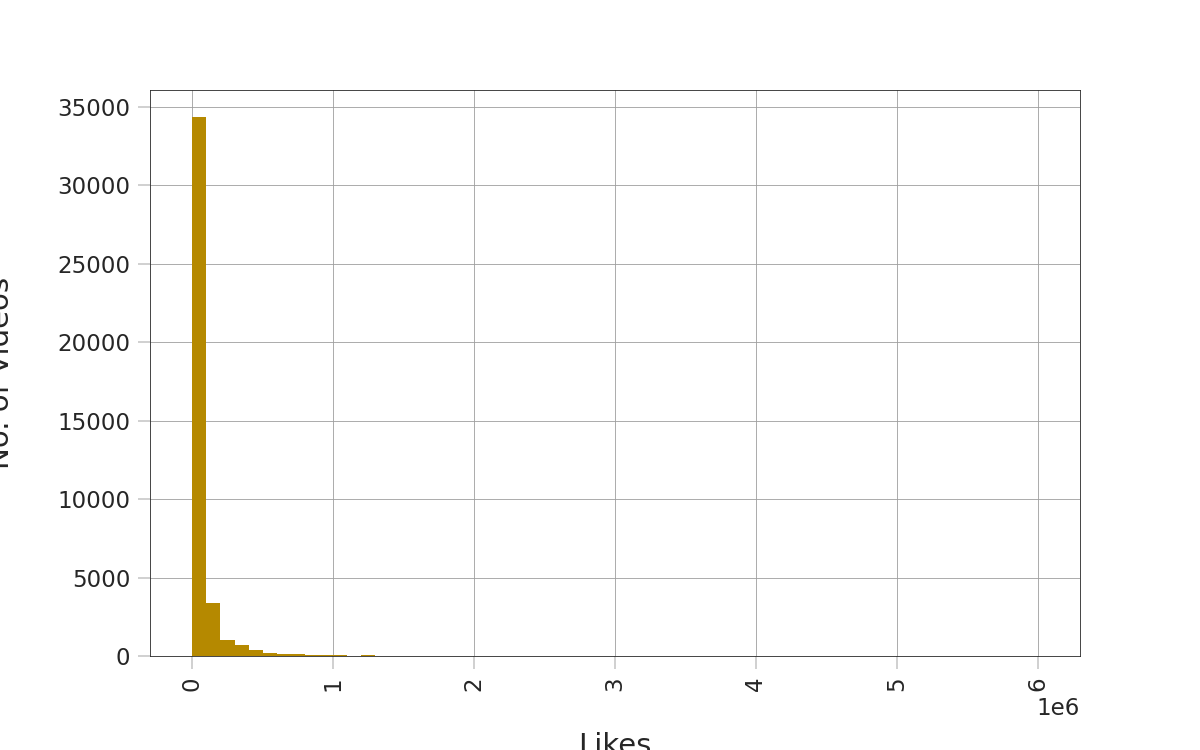

In [17]:
plt.rc('figure.subplot',wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, color=PLOT_COLORS[3],
                hist_kws={'alpha':1}, bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of Videos")
_ = plt.xticks(rotation=90)

we note that the vast majority of trending videos have between 0 and 100,000 likes

**Since, a video could be in trending for several days. There might be multiple rows of a particular video. In order to calculate the total_views, comments, likes, dislikes, of a video. we need to groupby with video_id. The below script will give the total no. of views/comment/likes, and dislikes of a video**

In [18]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

#Separate date and time into two columns from 'publish_time' column
df.insert(4, 'pub_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df['pub_date'] = pd.to_datetime(df['pub_date'])

In [19]:
us_views = df.groupby(['video_id'])['views'].agg('sum')
us_likes = df.groupby(['video_id'])['likes'].agg('sum')
us_dislikes = df.groupby(['video_id'])['dislikes'].agg('sum')
us_comment_count = df.groupby(['video_id'])['comment_count'].agg('sum')

In [20]:
df_usa_sdtr = df.drop_duplicates(subset='video_id', keep=False, inplace=False)
df_usa_mdtr = df.drop_duplicates(subset='video_id', keep='first', inplace=False)

frames = [df_usa_sdtr, df_usa_mdtr]
df_usa_without_duplicates = pd.concat(frames)

df_usa_comment_disabled = df_usa_without_duplicates[df_usa_without_duplicates['comments_disabled']==True].describe()
df_usa_rating_disabled = df_usa_without_duplicates[df_usa_without_duplicates['ratings_disabled']==True].describe()
df_usa_video_error = df_usa_without_duplicates[df_usa_without_duplicates['video_error_or_removed']==True].describe()

Removing duplicates to get the correct numbers otherwise there will be redundancy
Getting the number of videos on which comments disabled/rating disabled/video error

How many videos trending per day?

In [21]:
df_usa_sdtr.head()

,video_id,trending_date,title,channel_title,pub_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,2017-11-13,17,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,2017-11-12,1,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,2017-11-12,25,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,2017-11-10,24,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,2017-11-10,28,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


Approx 544 videos were trending per day in USA

# Videos trending for more than a day

In [22]:
df_usa_mdtr.head()

,video_id,trending_date,title,channel_title,pub_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Approx 4079 videos were trending per day in USA

# which videos were trending on maximum days and what is the title, likes, dislikes, comments, and views.

<IPython.core.display.Javascript object>


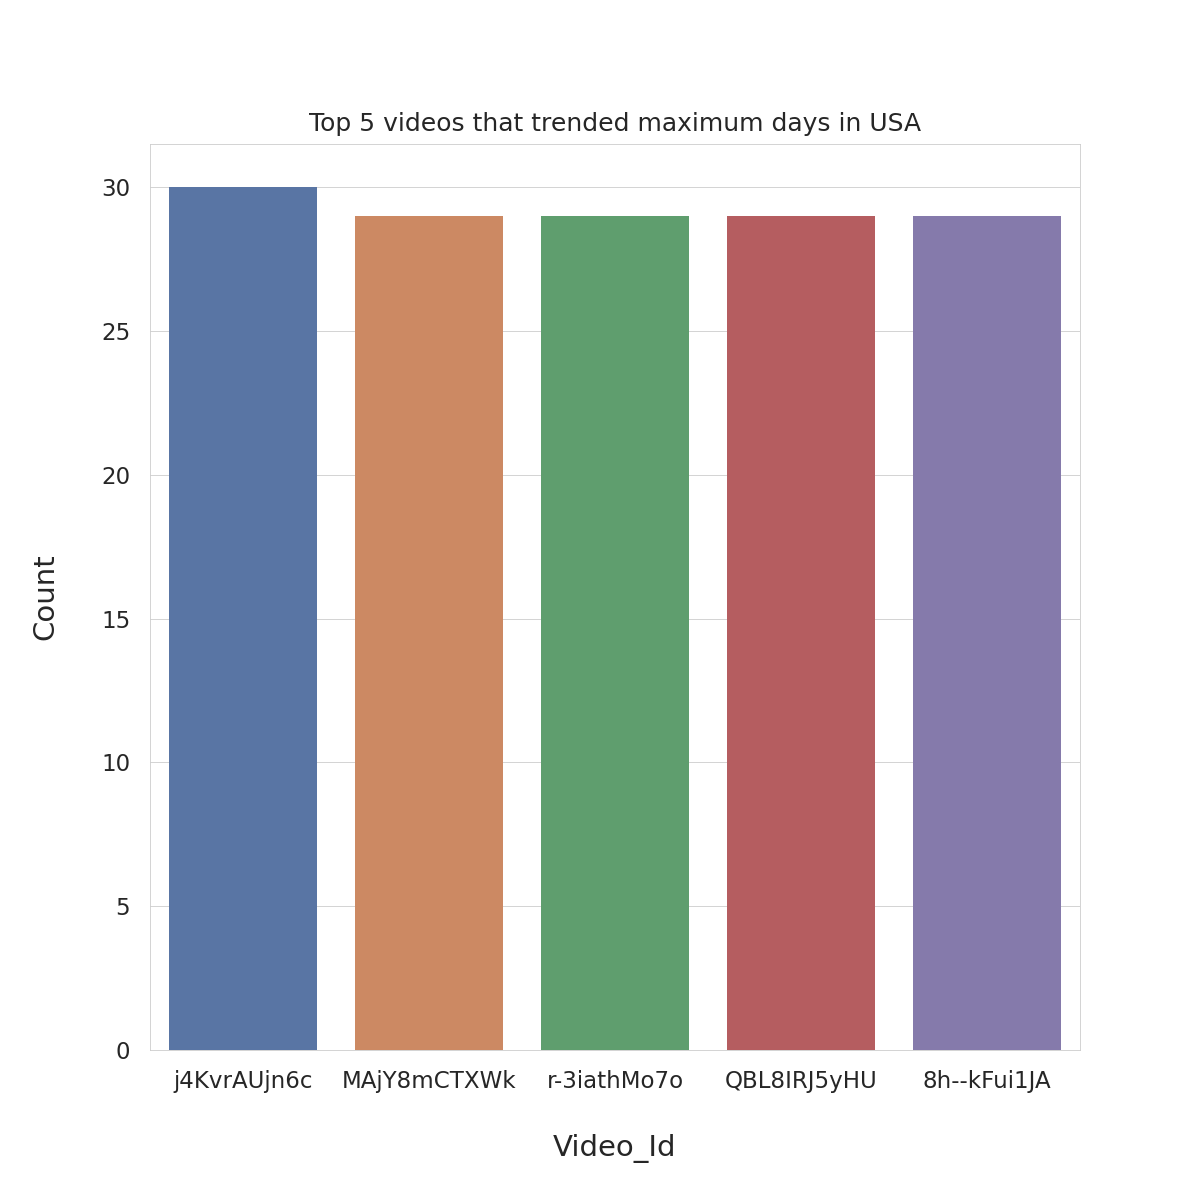

Text(0.5, 1.0, 'Top 5 videos that trended maximum days in USA')

In [23]:
df_usa_mdtr = df.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_usa_mdtr['video_id'],y=df_usa_mdtr['trending_date'], data=df_usa_mdtr)
plt.xlabel("Video_Id")
plt.ylabel("Count")
plt.title("Top 5 videos that trended maximum days in USA")

**Videos were trended for maximum days**
The Maximum no. of days a video trended is 30 i.e. for 'j4KvrAUjn6c' video id. Now, the below script gives its likes, dislikes, views and comments.

In [24]:
df_us_max_views = us_views['j4KvrAUjn6c']
df_us_max_likes = us_likes['j4KvrAUjn6c']
df_us_max_dislikes = us_dislikes['j4KvrAUjn6c']
df_us_max_comment = us_comment_count['j4KvrAUjn6c']

# **Top Trending Channel in USA**

<IPython.core.display.Javascript object>


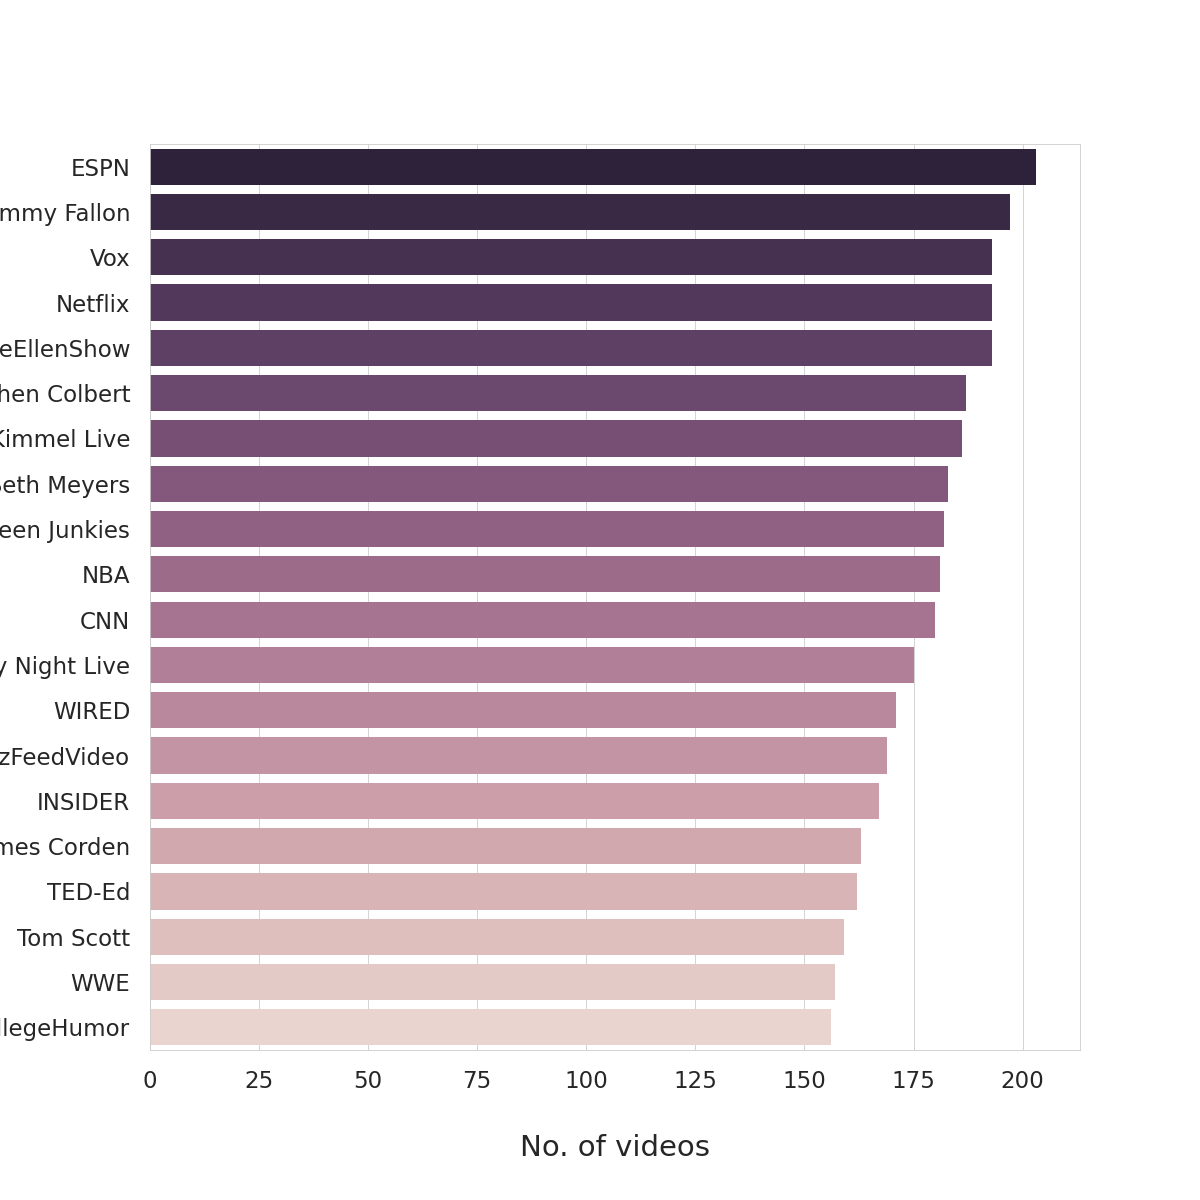

In [25]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
.sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=20, reverse=True),ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

ESPN is in the Top list of channels in USA

# **TOP 5 USA Categories**

<IPython.core.display.Javascript object>


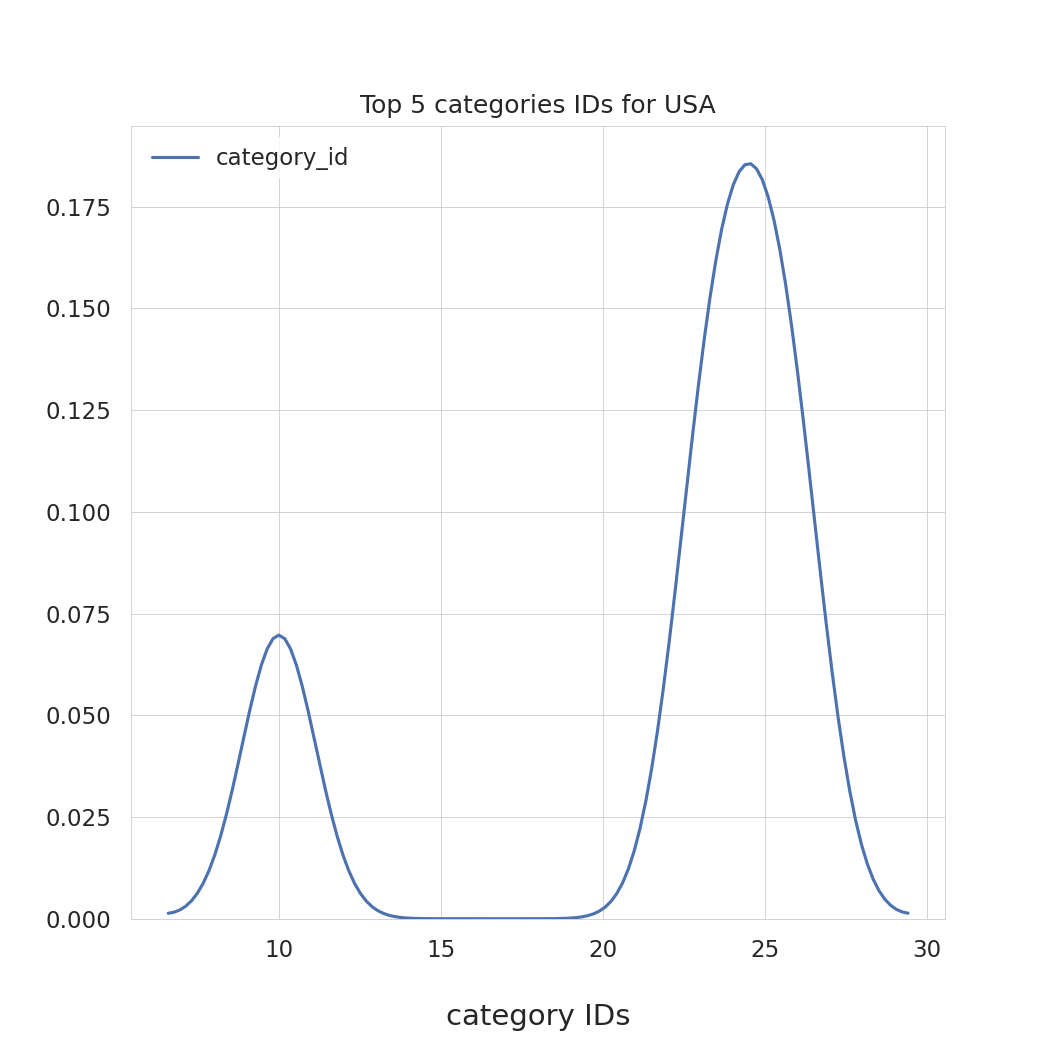

Text(0.5, 1.0, 'Top 5 categories IDs for USA')

In [26]:
usa_category_id = df_usa_without_duplicates.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)

plt.figure(figsize=(7,7))
sns.kdeplot(usa_category_id['category_id']);
plt.xlabel("category IDs")
plt.ylabel("Count")
plt.title("Top 5 categories IDs for USA")

This graph visualizes 24 category Id to be maximum in the range of 22-27

# Which Video Category has the largest number of trending videos?

First, we will add a column that contains category names based on the values in category_id column. We will use a category JSON file provided with the dataset which contains information about each category.

In [27]:
import simplejson as json
with open("../input/youtube-new/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

Now we can see which category had the largest number of trending videos

<IPython.core.display.Javascript object>


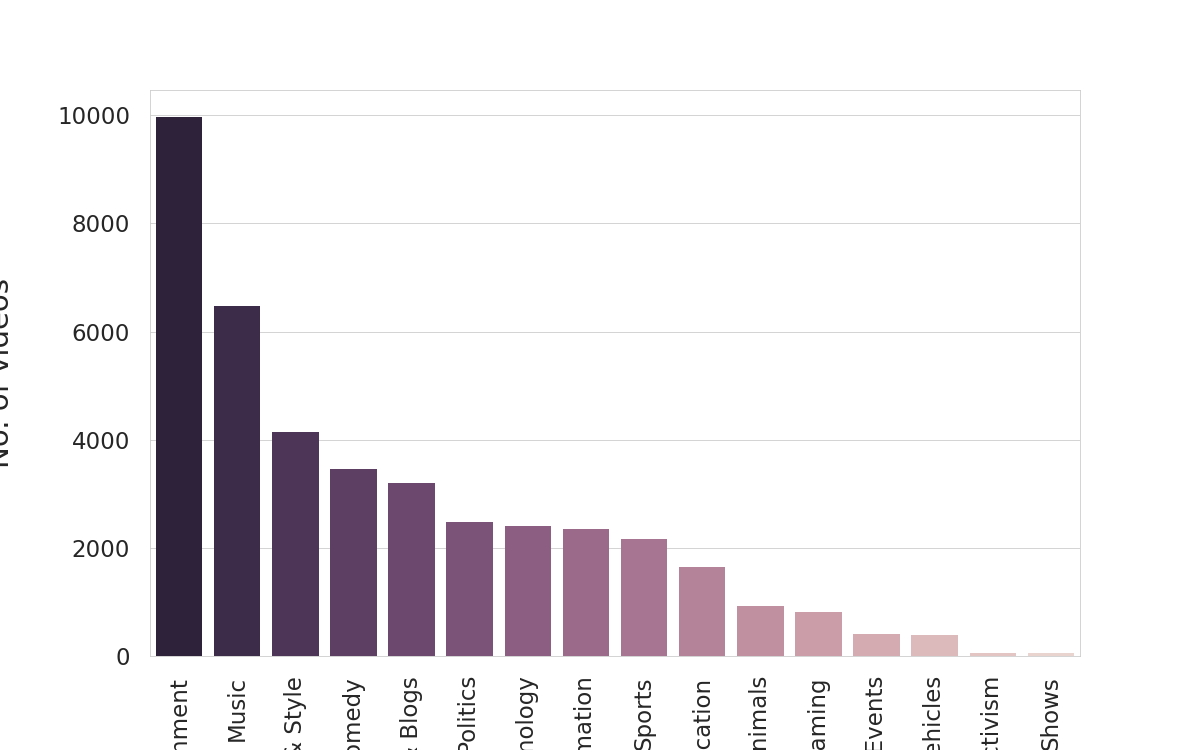

In [28]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

We see that the Entertainment category contains the largest number of trending videos among other categories: around 10,000 videos, followed by Music category with around 6,200 videos, followed by Howto & Style category with around 4100 videos and so on.

# How many video titles contain Capitalized word?

Now we want to see how many trending video titles contain atleast a capitalized word(e.g.HOW). To do that, we will add a new variable (column) to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise

<IPython.core.display.Javascript object>


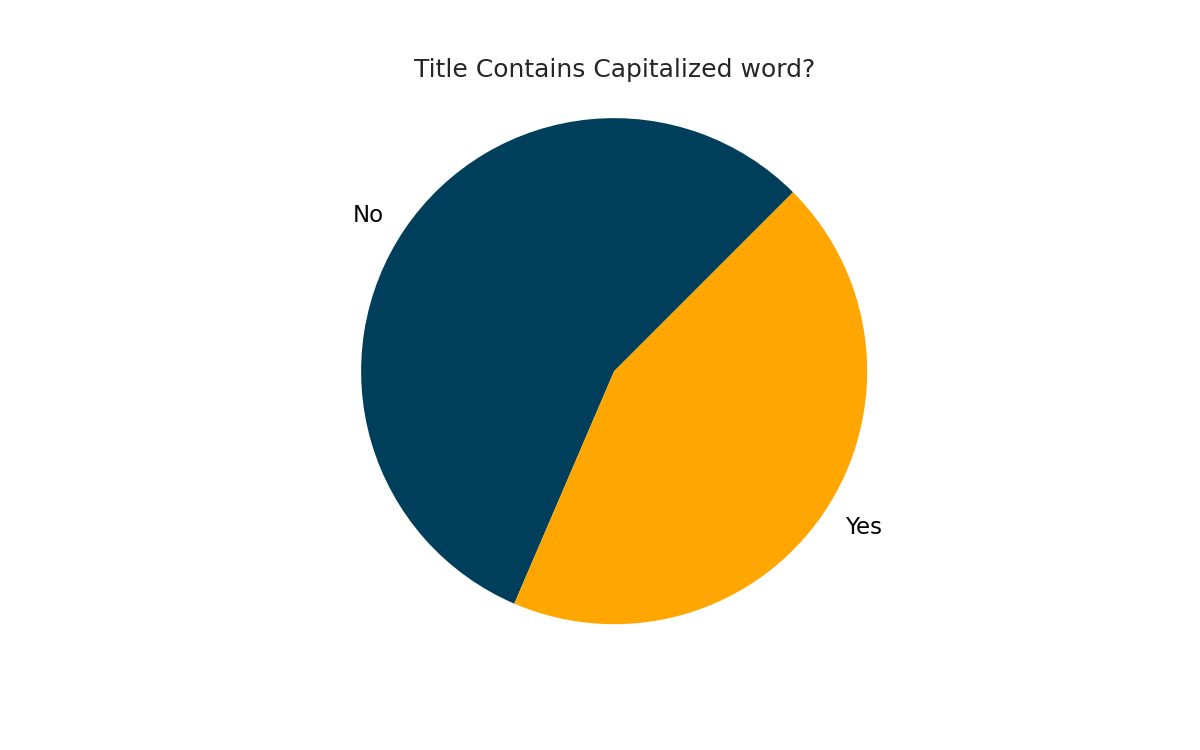

In [29]:
def Capitalized_word(s):
    for m in s.split():
        if m.isupper():
            return True
    return False

df["contains_capital_words"] = df["title"].apply(Capitalized_word)

value_counts = df["contains_capital_words"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No','Yes'],
          colors=['#003f5c', '#ffa600'], textprops={'color':'#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized word?')

In [30]:
df["contains_capital_words"].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capital_words, dtype: float64

we can see that 44% of trending video titles contain atleast a capitalized word. we will later use this added new column contains_capital_words in analyzing correlation between variables

# Video Title Lengths
We will add another column to dataset to represent the length of each video title,and visualize it in histogram to understand about the lengths of trending video title

<IPython.core.display.Javascript object>


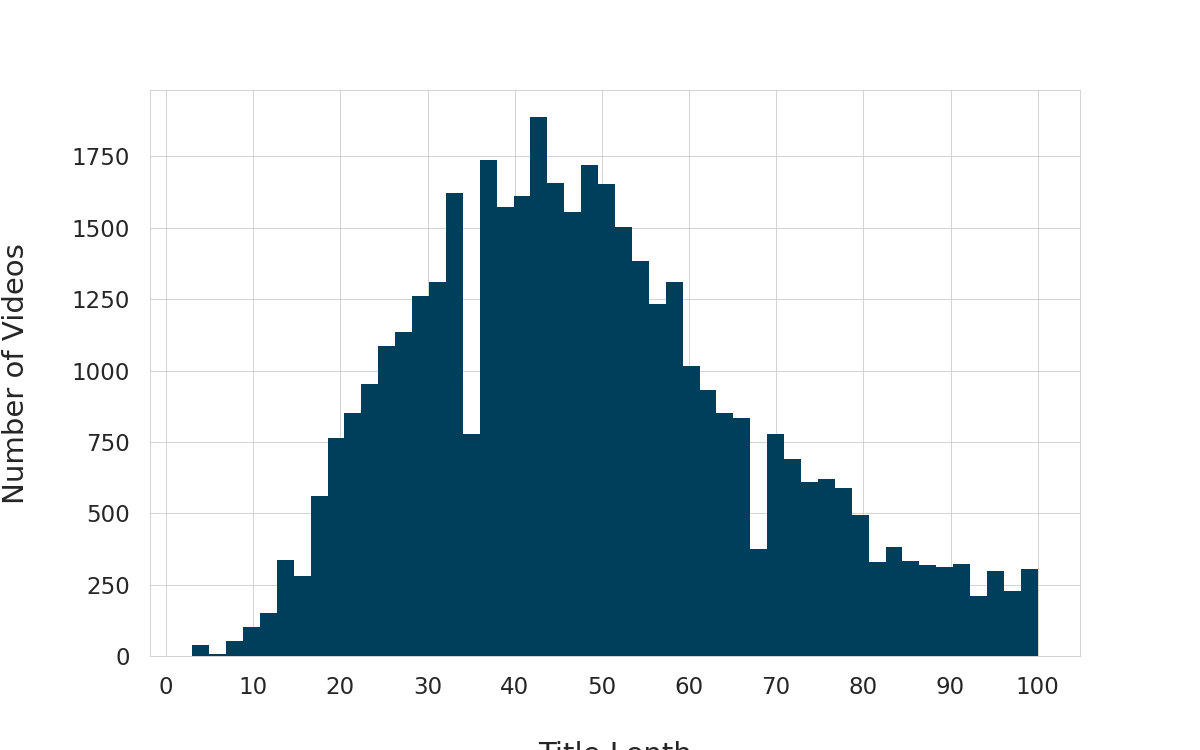

In [31]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde = False, rug = False, color=PLOT_COLORS[4], hist_kws={'alpha':1},
                ax=ax)
_ = ax.set(xlabel="Title Lenth", ylabel = "Number of Videos", xticks=range(0, 110, 10))

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 characters approximately.

Now let's draw a scatter plot between title length and number of views to see the relationship between these two variables

<IPython.core.display.Javascript object>


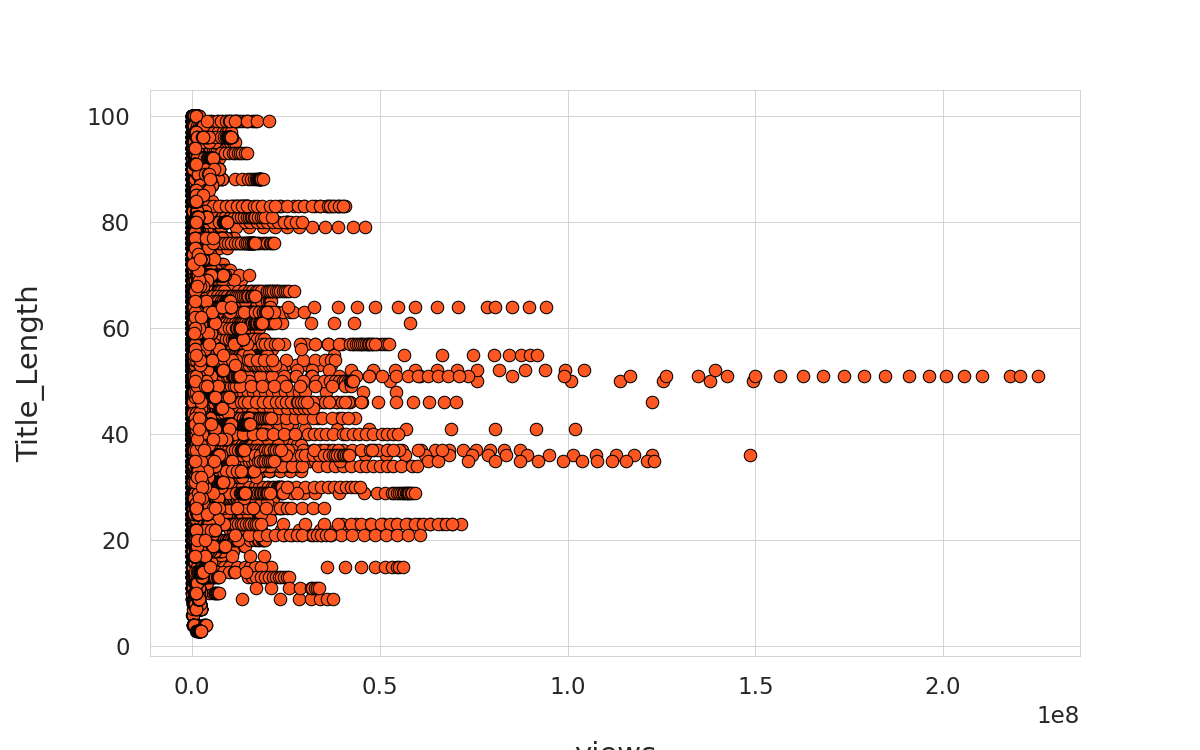

In [32]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", 
               linewidth=0.5)
_ = ax.set(xlabel = "views", ylabel = "Title_Length")

In the above scatter plot,we can see there is no relationship between these two variable i.e. title_length and number of views. 

There is one interesting thing - videos that have 100,00,000 views have more than title length between 33 and 55 characters approximately.

# Most Common Words in video Title
we will verify significant words in trending video titles. we will display the 25 most common words in all trending video titles

In [33]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

In 40949 videos - "-" and "|" have appeared 11452 and 10663 times respectively.
We notice also that words "Video","Trailer","How" and "2018" are common in trending video titles; each occured in 1613-1901 video titles.

**We will draw a word cloud for most frequent words used**

<IPython.core.display.Javascript object>


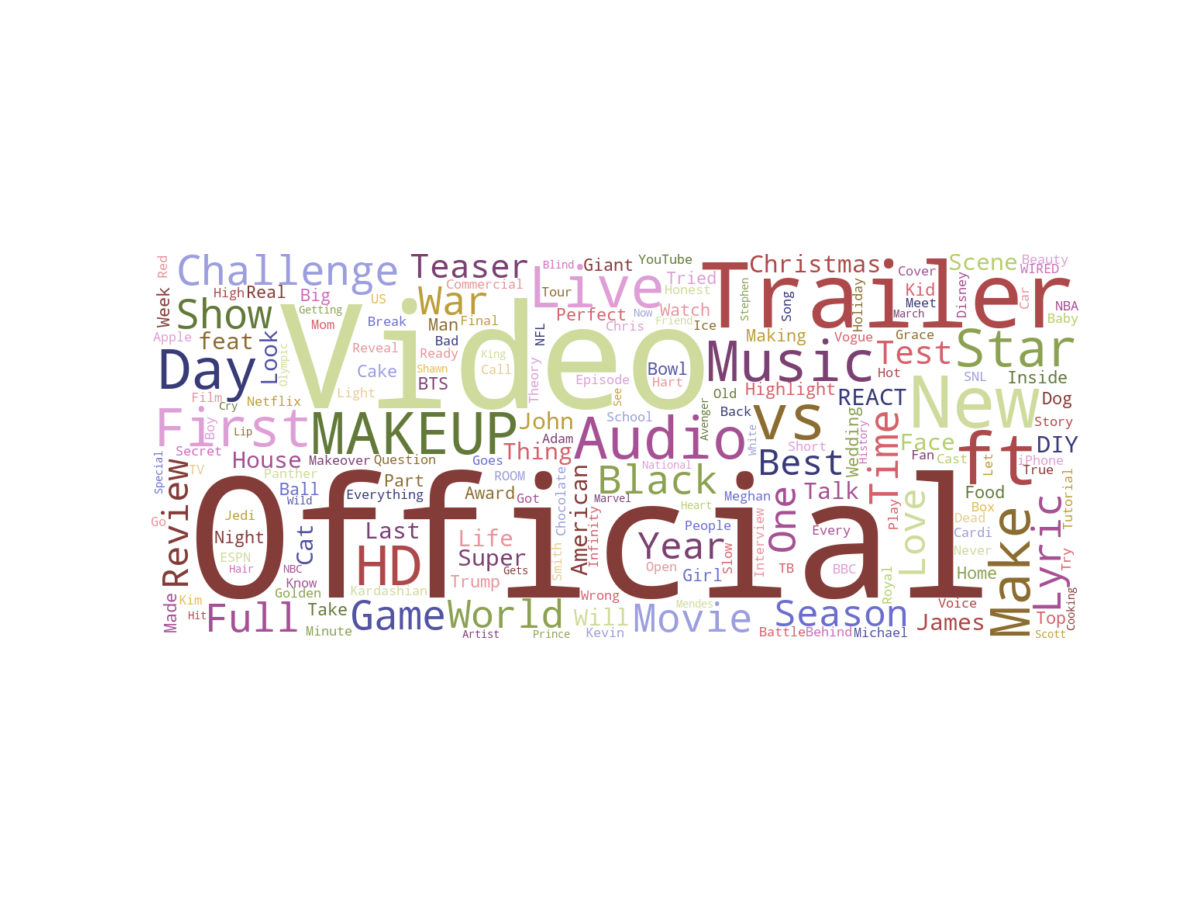

In [34]:
#wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, Stopwords=None, 
#background_color="white",colormap="tab20b").generate_from_frequencies(dist(Counter(title_words).most_common(500)))

wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, background_color="white",
                        colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(8,6))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

# Trending Videos and Publishing Time

Publish time is Cordinated Universal Time(UTC) time zone

We will add the date and hour of publishing each video, remove original publishing time column as we will not need it

# To be Continuedd....